Naoki Atkins

Project 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
np.set_printoptions(suppress=True)

***Question 1***

In [2]:
data = np.load('./boston.npz')

***Question 2***

In [3]:
features = data['features']
target = data['target']

X = features
y = target[:,None]

In [4]:
X = np.concatenate((np.ones((len(X),1)),X),axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=(2021-3-11))

***Question 3***

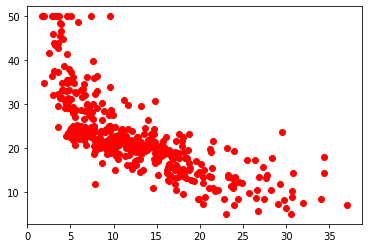

In [6]:
plt.plot(X_train[:,13], y_train, 'ro')

The relationship seems to follow more of a negative quadratic than a linear line.

***Question 4***

In [7]:
LSTAT = X_train[:,13][:,None]
MEDV = y_train

In [8]:
reg = LinearRegression().fit(LSTAT, MEDV)

In [9]:
reg.coef_

array([[-0.98093888]])

In [10]:
reg.intercept_

array([34.99113302])

MEDV = 34.991133021969475 + (-0.98093888)(LSTAT)

***Question 5***

In [11]:
abline = np.array([reg.intercept_, reg.coef_], dtype=object)

In [12]:
testx = np.linspace(0,40,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,abline)

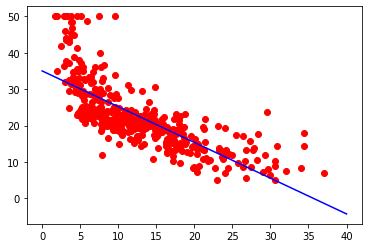

In [13]:
plt.figure()
plt.plot(LSTAT,MEDV,'ro')
plt.plot(testx,testt,'b')

The model fits decently well along the center of the mass of data. Around the extremes, the line is a little bit off.

***Question 6***

In [14]:
pred = reg.predict(LSTAT)

In [15]:
mean_squared_error(y_train, pred)

38.47893344802523

Average Loss = 38.47893344802523

***Question 7***

In [16]:
pred_test = reg.predict(X_test[:,13][:,None])

In [17]:
mean_squared_error(y_test, pred_test)

38.75054664279496

Test MSE is slightly higher, which means that there is a slight overfit

***Question 8***

In [18]:
LSTAT_sqr = np.hstack((np.ones_like(LSTAT), LSTAT, LSTAT**2))

In [19]:
reg = LinearRegression().fit(LSTAT_sqr, MEDV)

In [20]:
pred_train_LSTAT_sqr = reg.predict(LSTAT_sqr)

In [21]:
MSE_train_sqr = mean_squared_error(y_train, pred_train_LSTAT_sqr)

In [22]:
MSE_train_sqr

30.59851434937097

In [23]:
LSTAT_sqr_test = np.hstack((np.ones_like(X_test[:,13][:,None]), X_test[:,13][:,None], X_test[:,13][:,None]**2))

In [24]:
pred_test_LSTAT_sqr = reg.predict(LSTAT_sqr_test)

In [25]:
MSE_test_sqr = mean_squared_error(y_test, pred_test_LSTAT_sqr)

In [26]:
MSE_test_sqr

29.297124138279163

The test set has a lower MSE compared to the training set which means the model is fitting well.

***Question 9***

In [27]:
reg.coef_

array([[ 0.        , -2.365919  ,  0.04440767]])

In [28]:
reg.intercept_

array([43.07121508])

In [29]:
squared_line = [reg.intercept_, reg.coef_[0][1], reg.coef_[0][2]]

In [30]:
testx = np.linspace(0,40,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx, testx**2))
testt = np.dot(testX,squared_line)

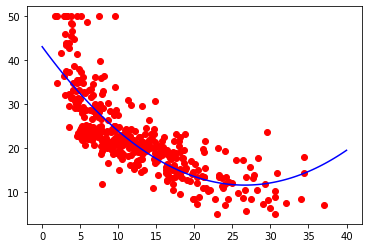

In [31]:
plt.figure()
plt.plot(LSTAT,MEDV,'ro')
plt.plot(testx,testt,'b')

Model fits pretty well. Better than the line.

***Question 10***

In [32]:
reg = LinearRegression().fit(X_train, y_train)

In [33]:
reg.coef_

array([[  0.        ,  -0.11972196,   0.05296359,   0.05161503,
          2.55847703, -17.25240202,   4.08697043,  -0.00464415,
         -1.52421308,   0.29963832,  -0.01371524,  -0.84891262,
          0.00656971,  -0.53327603]])

In [34]:
reg.intercept_

array([34.33727849])

In [35]:
pred = reg.predict(X_train)

In [36]:
mean_squared_error(y_train, pred)

21.046340805342368

The above mean square error is for the training set

In [37]:
pred_test = reg.predict(X_test)

In [38]:
mean_squared_error(y_test, pred_test)

25.976408935996396

This model with polynomial features fits better as compared to the linear model with just a single feature. Making the model more complex allows it to fit the data more flexibly. This causes the MSE to go lower. 

***Question 11***

In [39]:
train_square_matrix = np.hstack((X_train, X_train**2))

In [40]:
model = LinearRegression().fit(train_square_matrix, MEDV)

In [41]:
pred_train_sqr = model.predict(train_square_matrix)

In [42]:
MSE_train_sqr = mean_squared_error(y_train, pred_train_sqr)
MSE_train_sqr

13.508100802461712

In [43]:
test_square_matrix = np.hstack((X_test, X_test**2))

In [44]:
pred = model.predict(test_square_matrix)

In [45]:
mean_squared_error(y_test, pred)

17.857896093032977

The MSE's for the matrix of the squares of all the 13 input features performs better than the just the matrix of the features themselves. However, the testing set shows that the model is overfitting a little

***Question 12***

In [46]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)

In [47]:
pred = model.predict(X_train_poly)
mean_squared_error(y_train, pred)

10.961332604177754

In [48]:
pred = model.predict(X_test_poly)
mean_squared_error(y_test, pred)

21.27495081416152

The model is now overfitting the data after fitting a polynomial matrix with interaction terms added.